# Robustness to heterogeneity

In [1]:
require('cowplot')
library('ggplot2')
source(file.path('..','commons','get_expected_pval_and_equiv_z.R'))
source(file.path('..','commons','multiplot.R'))
source(file.path('..','commons','plot_lib.R'))
source(file.path('..', 'commons','prepare_data.R'))
source(file.path('..', 'commons','plot_unit_mismatch.R'))
source(file.path('..', 'commons','plot_blandaldman_z.R'))
source(file.path('..', 'commons','plot_grid_methods_color_within.R'))
source(file.path('..', 'commons','plot_qq_p.R'))
theme_set(theme_gray()) # switch to default ggplot2 theme for good

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
# allsimudat_k05 <- load_data_from_csv('^test1_k005.*', '/Volumes/camille/IBMA_simu/')
# allsimudat_k10 <- load_data_from_csv('^test1_k010.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k25_n20 <- load_data_from_csv('^test1_k025_n20.*', '/Volumes/camille/IBMA_simu/')
# allsimudat_k25_n100 <- load_data_from_csv('^test1_k025_n100_.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k50 <- load_data_from_csv('^test1_k050.*', '/Volumes/camille/IBMA_simu/')

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n20.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k050.csv"


In [3]:
allsimudat <- rbind(
#                     allsimudat_k10, 
#                     allsimudat_k05, 
                    allsimudat_k25_n20, 
#                     allsimudat_k25_n100,
                    allsimudat_k50
)

In [19]:
allsimudat$small_sample <- ' '
allsimudat$small_sample[allsimudat$nStudies==25] <- 'Small sample'

allsimudat$heterogeneity <- 'Homogeneous'
allsimudat$heterogeneity[allsimudat$withinVariation!=1] <- 'Heterogeneous'

allsimudat$rfx <- 'FFX'
allsimudat$rfx[allsimudat$Between==1] <- 'RFX'

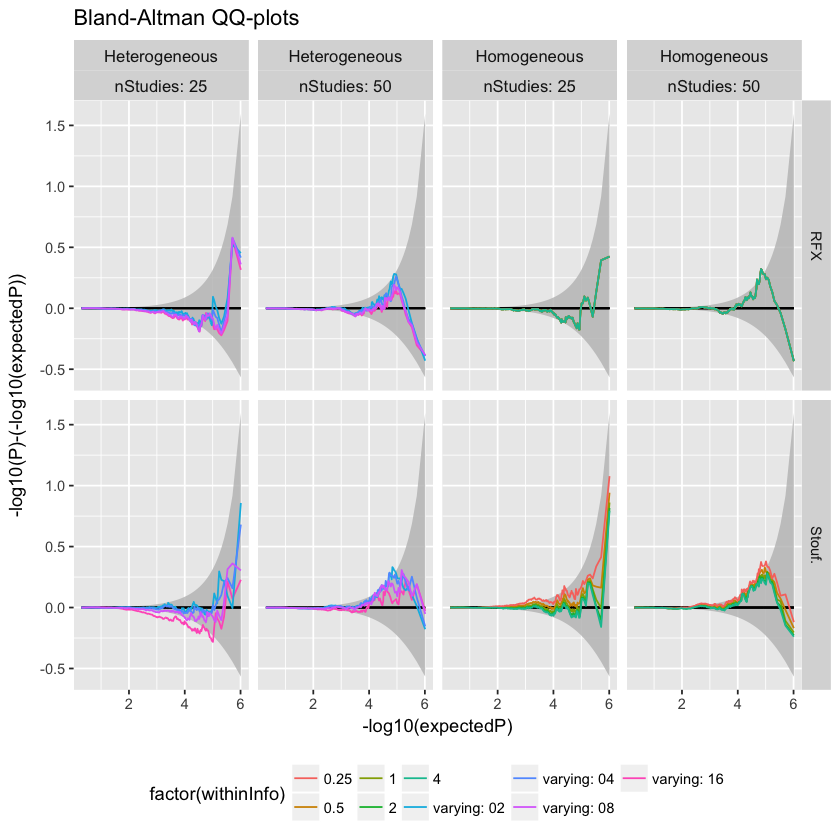

In [20]:
source(file.path('..', 'commons','plot_blandaldman_z.R'))
# robustness_to <- c(" small_sample"," heterogeneity") #," RFX")
robust_to_data <- subset(allsimudat, is.finite(expectedz) & expectedz>0)#  &  robustness %in% robustness_to)

# con_methods <- c("megaMFX","megaMFX2","megaRFX","permutCon", "megaFFX_FSL")
# con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

robust_to_data <- subset(robust_to_data, (
#     (methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") & Between==1)  |
#      (methods %in% c("megaFFX_FSL") & Between==0) |
#      (methods %in% c("permutCon") & Between==1) | 
#      (methods %in% c("fishers") & Between==0) | 
#      (methods %in% c("stouffers") & Between==0)  |
     (methods %in% c("stouffersMFX") & Between==1)  
#      (methods %in% c("weightedZ") & Between==0) |
#      (methods %in% c("permutZ") & Between==1)
    ) & (unitMism=="nominal"))

# best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
# best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
# best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_qq_p(
    list(subset(robust_to_data, rfx=='RFX')), 
    formula=methods~heterogeneity+nStudies, 
    title="Bland-Altman QQ-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

# plot_unit_mismatch(
#     subset(best_con_data_1_n20, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
#     'one-sample test, k=25, n=20', mult=FALSE, single=TRUE, lim=NA, max_z=18)

# Robustness to random-effects

### Main figure

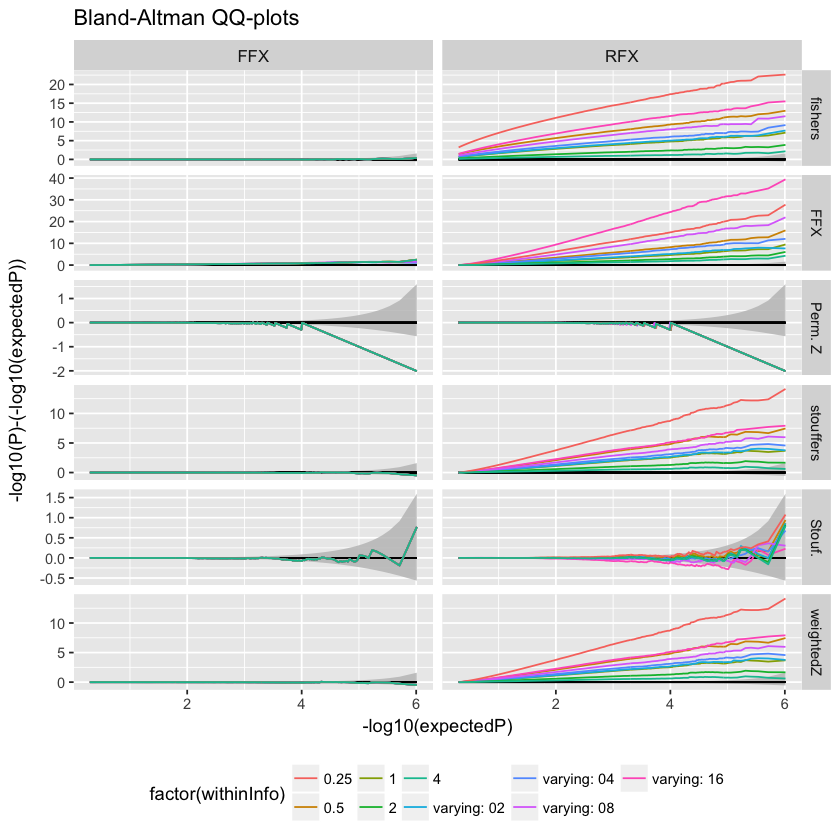

In [35]:
# robustness_to <- c(" small_sample"," heterogeneity") #," RFX")
robust_to_rfx_data <- subset(allsimudat, is.finite(expectedz) & expectedz>0)#  &  robustness %in% robustness_to)

# con_methods <- c("megaMFX","megaMFX2","megaRFX","permutCon", "megaFFX_FSL")
# con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

robust_to_rfx_data <- subset(robust_to_rfx_data, (
#     (methods %in% c("megaMFX") & Between==1) | 
#      (methods %in% c("megaRFX") & Between==1)  |
     (methods %in% c("megaFFX_FSL")) |
#      (methods %in% c("permutCon") & Between==1) | 
     (methods %in% c("fishers")) | 
     (methods %in% c("stouffers"))  |
     (methods %in% c("stouffersMFX")) |
     (methods %in% c("weightedZ")) |
     (methods %in% c("permutZ"))
    ) & (unitMism=="nominal"))

# best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
# best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
# best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_qq_p(
    list(subset(robust_to_rfx_data, nStudies==25)), 
    formula=methods~rfx, 
    title="Bland-Altman QQ-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

# plot_unit_mismatch(
#     subset(best_con_data_1_n20, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
#     'one-sample test, k=25, n=20', mult=FALSE, single=TRUE, lim=NA, max_z=18)

### Supplementary figure

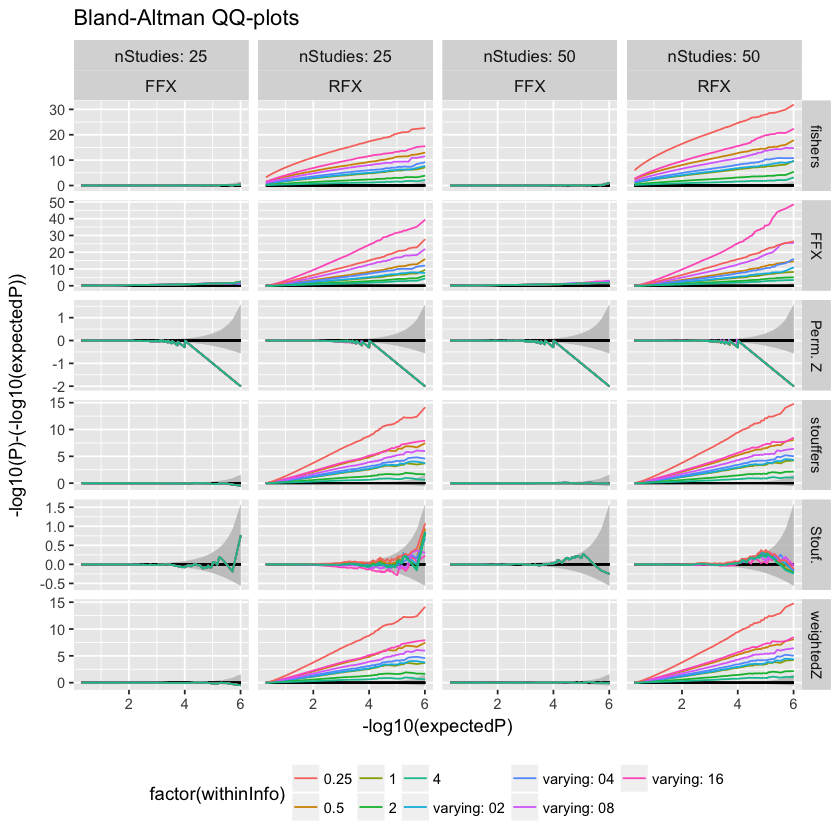

In [33]:
p <- plot_qq_p(
    list(robust_to_rfx_data), 
    formula=methods~nStudies+rfx, 
    title="Bland-Altman QQ-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

In [29]:
unique(allsimudat$rfx)

[1] "RFX" "FFX"

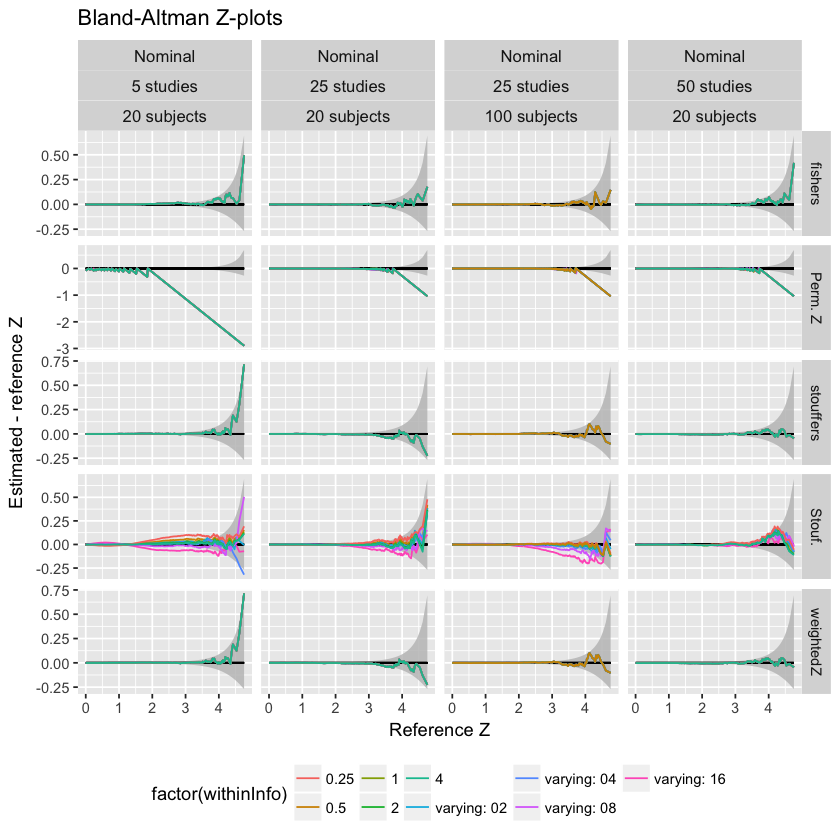

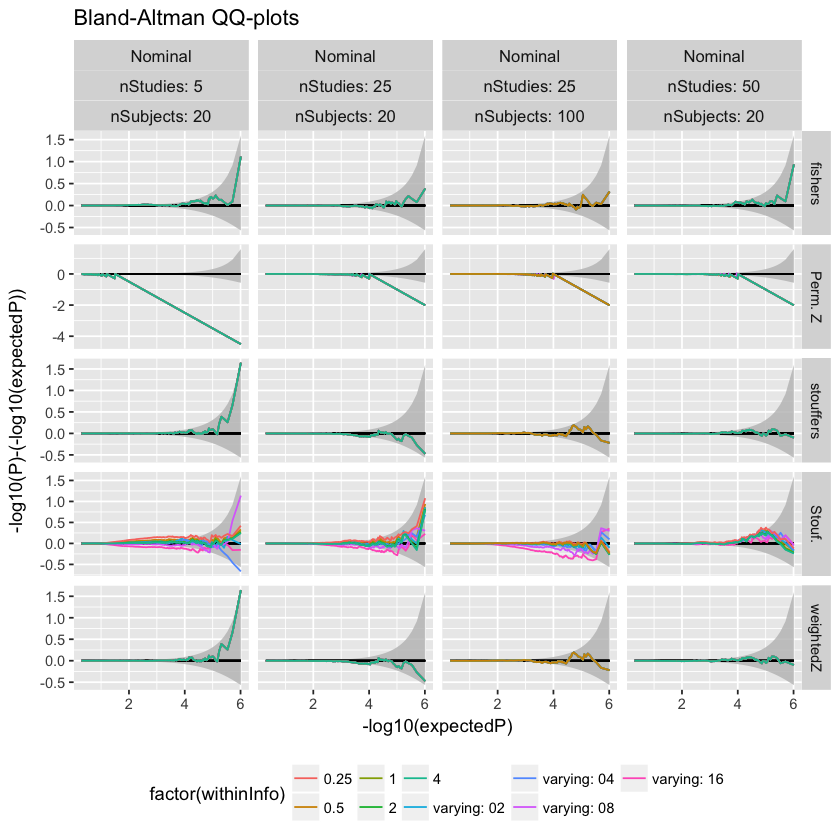

In [12]:
z_methods <- c("fishers", "stouffers", "stouffersMFX", "weightedZ", "permutZ")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% z_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("fishers") & Between==0) | 
     (methods %in% c("stouffers") & Between==0)  |
     (methods %in% c("stouffersMFX") & Between==1)  |
     (methods %in% c("weightedZ") & Between==0) |
     (methods %in% c("permutZ") & Between==1)
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

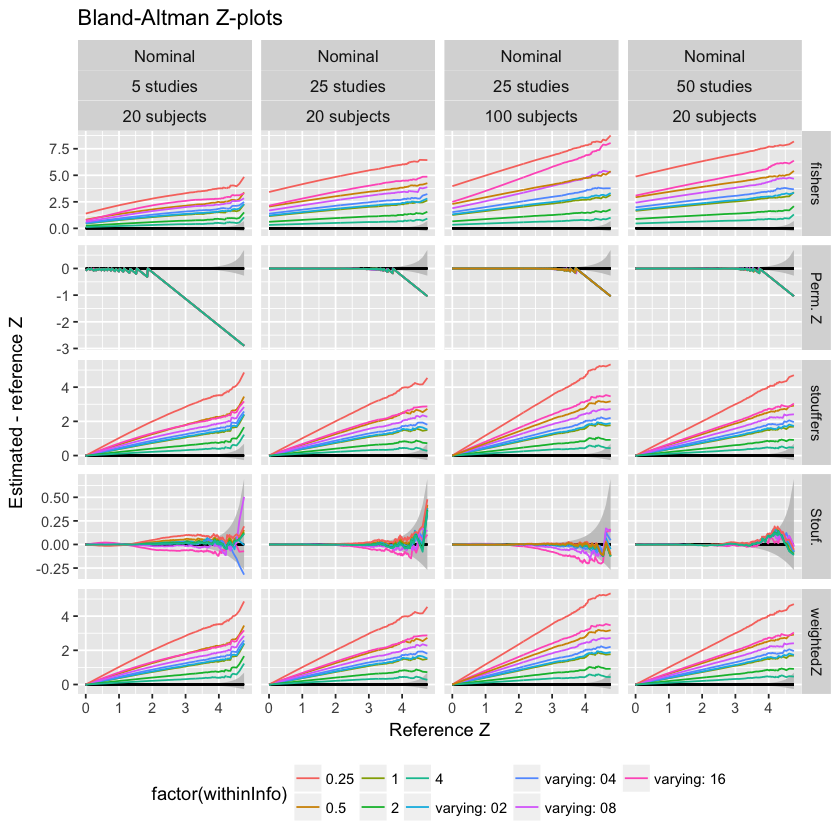

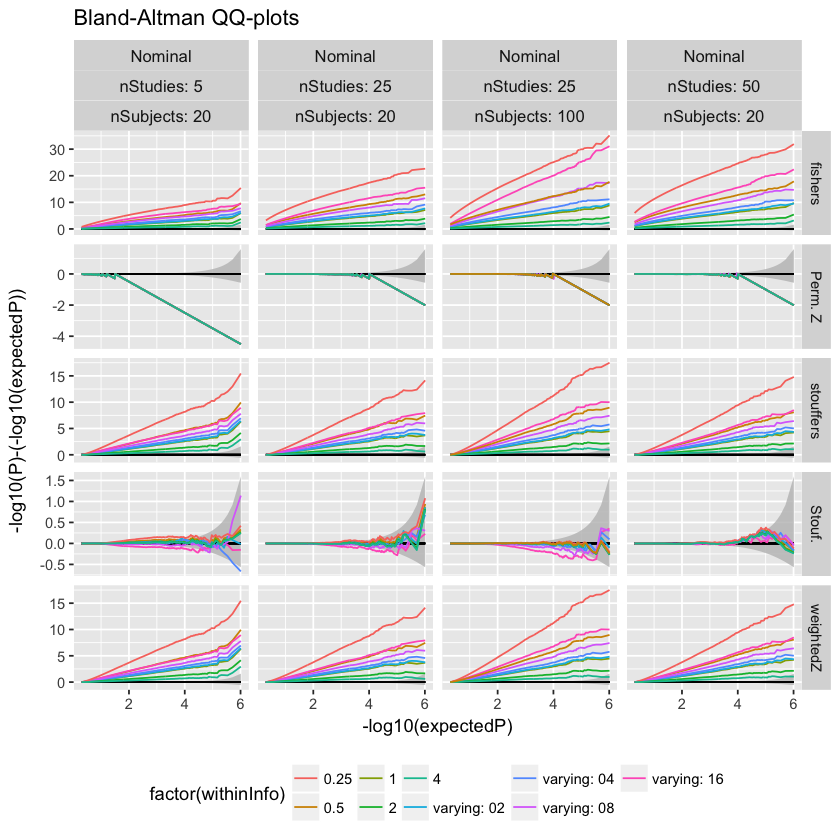

In [13]:
z_methods <- c("fishers", "stouffers", "stouffersMFX", "weightedZ", "permutZ")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% z_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("fishers") & Between==1) | 
     (methods %in% c("stouffers") & Between==1)  |
     (methods %in% c("stouffersMFX") & Between==1)  |
     (methods %in% c("weightedZ") & Between==1) |
     (methods %in% c("permutZ") & Between==1)
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

In [10]:
unique(allsimudat$methods)

[1] fishers      stouffers    stouffersMFX weightedZ    megaRFX     
[6] permutZ      permutCon    megaMFX      megaFFX_FSL 
9 Levels: fishers megaFFX_FSL megaMFX megaRFX permutCon permutZ ... weightedZ